In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('dataset_with_has_delay.csv')

In [18]:
X = df.drop(columns=['has_delay'])
y = df['has_delay']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
y_pred = model.predict(X_test)

In [22]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1737    0]
 [   0  481]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1737
           1       1.00      1.00      1.00       481

    accuracy                           1.00      2218
   macro avg       1.00      1.00      1.00      2218
weighted avg       1.00      1.00      1.00      2218



In [23]:
df[['Min Delay', 'Min Gap', 'has_delay']].corr()

,Min Delay,Min Gap,has_delay
Min Delay,1.000000,0.963514,0.512346
Min Gap,0.963514,1.000000,0.522502
has_delay,0.512346,0.522502,1.000000


In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000


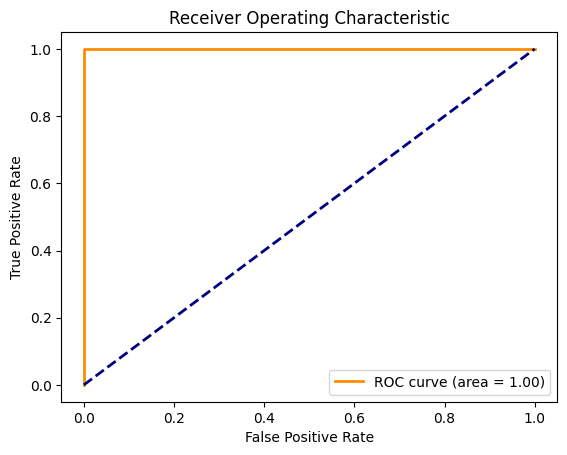

In [25]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()